### Load Data Frame ###

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Create your df here:
df = pd.read_csv("profiles.csv")

#### Explore Data ####

In [2]:
print(len(df))

59946


In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


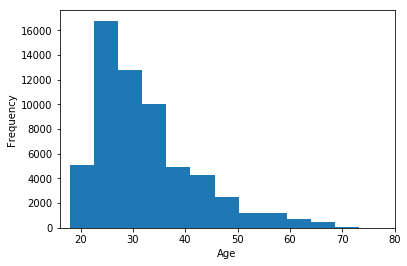

In [4]:
from matplotlib import pyplot as plt
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

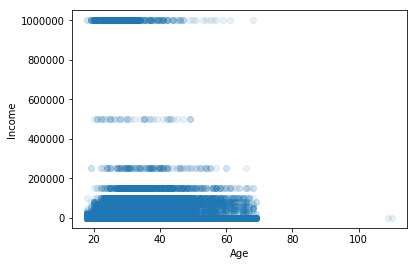

In [5]:
from matplotlib import pyplot as plt
plt.scatter(df.age,df.income,alpha=0.1)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

#### Categorizing data ####

Categorizing data based 3 Main categories as per slide deck

1. edu_cat - Education Category
Categorization of Education level of users

2. job_cat - Job Category
Categorization of job type based on whether it is STEM / Finance or not. (We believe STEM / Finance job type is of higher value)

3. income_cat = Income Category
Categorization of Income based on Pew Research
(http://www.pewresearch.org/fact-tank/2018/09/06/are-you-in-the-american-middle-class)


In [6]:
df['edu_cat'] = df['education'].map({ "graduated from college/university": 2, "graduated from masters program": 3, "working on college/university": 1, "working on masters program": 3, "graduated from two-year college": 2, "graduated from high school": 2, "graduated from ph.d program": 7, "graduated from law school": 5, "working on two-year college": 1, "dropped out of college/university": 2, "working on ph.d program": 3, "college/university": 1, "graduated from space camp": 3, "dropped out of space camp": 1, "graduated from med school": 6, "working on space camp": 1, "working on law school": 1, "two-year college": 1, "working on med school": 1, "dropped out of two-year college": 1, "dropped out of masters program": 3, "masters program": 4, "dropped out of ph.d program": 3, "dropped out of high school": 1, "high school": 1, "working on high school": 1, "space camp": 1, "ph.d program": 3, "law school": 1, "dropped out of law school": 1, "dropped out of med school": 1, "med school": 1 })
df['income_cat'] = df['income'].map({ 20000: 1, 30000: 1, 40000: 1, 50000: 2, 60000: 2, 70000: 2, 80000: 2, 100000: 2, 150000: 3, 250000: 3, 500000: 3, 1000000: 3 })
df['job_cat'] = df['job'].map({ "other": 2, "student": 1, "science / tech / engineering": 3, "computer / hardware / software": 3, "artistic / musical / writer": 2, "sales / marketing / biz dev": 2, "medicine / health": 3, "education / academia": 2, "executive / management": 2, "banking / financial / real estate": 4, "entertainment / media": 2, "law / legal services": 2, "hospitality / travel": 2, "construction / craftsmanship": 2, "clerical / administrative": 2, "political / government": 2, "rather not say": 2, "transportation": 2, "unemployed": 1, "retired": 1, "military": 2 })

#### Working on selection of data ####

* na_income: Entries from profiles.csv with N/A income where income = -1 - this will data we would like predict against
* nonstemfin: Non STEM / Finance job category profiles with a valid income value
* stem_data: STEM job category profiles with a valid income value
* fin_data: Finance job category profiles with a valid income value
* sel_data: Selected data (all entries from profiles.csv without N/A income) - this will be the data to train with


In [7]:
na_income = df[(df.income == -1 ) ]
nonstemfin = df[(df.income != -1) & (df.job_cat == 2)]
stem_data = df[(df.income != -1) & (df.job_cat == 3)]
fin_data = df[(df.income != -1) & (df.job_cat == 4)]
sel_data = df[(df.income != -1)]

In [8]:
print(len(na_income))
print(len(nonstemfin))
print(len(stem_data))
print(len(fin_data))
print(len(sel_data))

48442
6854
2781
365
11504


In [9]:
na_income.job_cat.value_counts()

2.0    23986
3.0    10456
1.0     4242
4.0     1901
Name: job_cat, dtype: int64

#### Further investigation into data ####
1. We are having a look at the Job categories of N/A income
2. We are also having a look at the Income category for the 3-4 job categories.

E:\Python\Miniconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\Python\Miniconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


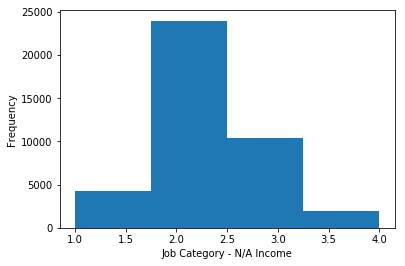

In [10]:
from matplotlib import pyplot as plt
plt.hist(na_income.job_cat, bins= 4)
plt.xlabel("Job Category - N/A Income")
plt.ylabel("Frequency")
plt.show()

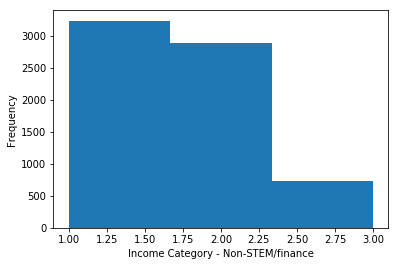

In [11]:
from matplotlib import pyplot as plt
plt.hist(nonstemfin.income_cat, bins=3)
plt.xlabel("Income Category - Non-STEM/finance")
plt.ylabel("Frequency")
plt.show()

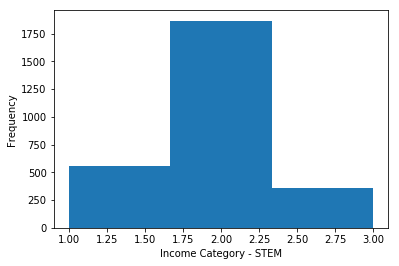

In [12]:
from matplotlib import pyplot as plt
plt.hist(stem_data.income_cat, bins=3)
plt.xlabel("Income Category - STEM")
plt.ylabel("Frequency")
plt.show()

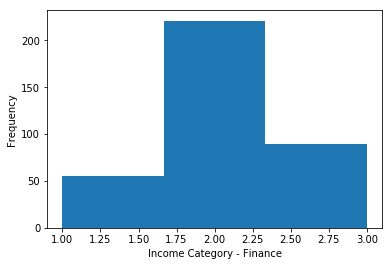

In [13]:
from matplotlib import pyplot as plt
plt.hist(fin_data.income_cat, bins=3)
plt.xlabel("Income Category - Finance")
plt.ylabel("Frequency")
plt.show()

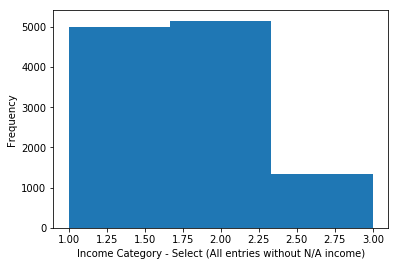

In [14]:
from matplotlib import pyplot as plt
plt.hist(sel_data.income_cat, bins=3)
plt.xlabel("Income Category - Select (All entries without N/A income)")
plt.ylabel("Frequency")
plt.show()

#### Cleanup data ####


In [15]:
rows_to_cluster_na_income = na_income.dropna(subset = ["age","education","edu_cat","height","job","job_cat"])
rows_to_cluster_sel_data = sel_data.dropna(subset = ["age","education","edu_cat","height","job","job_cat","income","income_cat"])

#### Exploratory Analysis ####

1. We can see that our income to income categorization has a decent correlation value of around 0.596055. Hence, using the categorization as prescribed by Pews should be OK moving forward with this dataset.
2. We can see some correlation with regards to age with income category, education category with income category, job category with income category. (with values ranging between 0.2 ~ 0.35)

In [16]:
sel_data.corr()

,age,height,income,edu_cat,income_cat,job_cat
age,1.000000,-0.011684,-0.009234,0.277298,0.273605,0.146247
height,-0.011684,1.000000,0.058829,0.014319,0.119974,0.062812
income,-0.009234,0.058829,1.000000,0.055115,0.596055,0.030809
edu_cat,0.277298,0.014319,0.055115,1.000000,0.291126,0.200783
income_cat,0.273605,0.119974,0.596055,0.291126,1.000000,0.317748
job_cat,0.146247,0.062812,0.030809,0.200783,0.317748,1.000000


#### Features selection for ML ####
The following are the key features for ML
1. age
2. job_cat
3. edu_cat
4. income_cat (label)

In [17]:
# Initialize selection
sel_data_fs = rows_to_cluster_sel_data[['age', 'edu_cat',"job_cat","income_cat",]]
na_income_fs = rows_to_cluster_na_income[['age', 'edu_cat',"job_cat"]]

# Drop NA
sel_data_fs_dna = sel_data_fs.dropna(subset = ["age","edu_cat","job_cat","income_cat"])
na_income_fs_dna = na_income_fs.dropna(subset = ["age","edu_cat","job_cat"])

# Finalize features selection / label
sel_data_fs_ml = sel_data_fs_dna[['age', 'edu_cat','job_cat']]
sel_data_fs_label = sel_data_fs_dna[["income_cat"]]

na_income_fs_ml = na_income_fs_dna

print(len(rows_to_cluster_na_income))

37639


## KNeighborsClassifer ##

In [18]:
from sklearn.model_selection import train_test_split

#Creating Train / Test sets
X_train, X_test, y_train, y_test = train_test_split(sel_data_fs_ml, sel_data_fs_label, test_size = 0.2, random_state = 1)

#print(X_train.head())
#print(y_train.head().values.ravel())

#print(type(y_train.head()))
#print(type(y_train.head().values.ravel()))

cols = ['age', 'edu_cat','job_cat']

In [19]:
# Perform classification based on KneighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15)
#classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train.values.ravel())

# Score the classifier
print(classifier.score(X_test, y_test))


0.6361480075901328


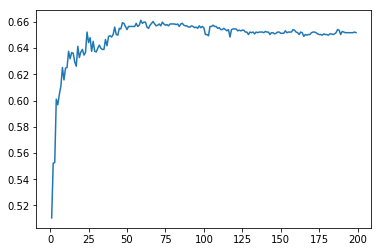

In [20]:
# Find optimum K value across range of 1-200
scores = []
for k in range(1, 200):
    classifier_n = KNeighborsClassifier(n_neighbors = k)
    classifier_n.fit(X_train, y_train.values.ravel())
    scores.append(classifier_n.score(X_test, y_test))
    
plt.plot(range(1,200), scores)
plt.show()

#### Compare X Test prediction vs actual count of Y test output

In [21]:
# X Test Prediction

kn_xtest_predict = classifier.predict(X_test)
#print(type(unknown_predict))

kn_xtest_predict_df = pd.DataFrame({
    'kn_predict_label': kn_xtest_predict
})

kn_xtest_predict_df.kn_predict_label.value_counts()


2.0    1193
1.0     896
3.0      19
Name: kn_predict_label, dtype: int64

In [22]:
# Y test output

y_test.income_cat.value_counts()

2.0    949
1.0    904
3.0    255
Name: income_cat, dtype: int64

#### Perform prediction of N/A income entries to predict Income Category

In [23]:
kn_naincome_predict = classifier.predict(na_income_fs_ml)

kn_naincome_predict_df = pd.DataFrame({
    'kn_predict_label': kn_naincome_predict
})

kn_naincome_predict_df.kn_predict_label.value_counts()

2.0    22691
1.0    14607
3.0      341
Name: kn_predict_label, dtype: int64

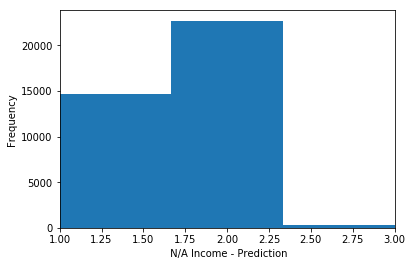

In [24]:
from matplotlib import pyplot as plt
plt.hist( kn_naincome_predict_df.kn_predict_label, bins=3)
plt.xlabel(" N/A Income - Prediction")
plt.ylabel("Frequency")
plt.xlim(1, 3)
plt.show()

## KMeans ##

In [25]:
from sklearn.cluster import KMeans
import random
import timeit
from mpl_toolkits.mplot3d import Axes3D

X_train, X_test, y_train, y_test = train_test_split(sel_data_fs_ml, sel_data_fs_label, test_size = 0.1, random_state = 1)

kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(X_train)
kmeans_label = kmeans_model.predict(X_train)
print(kmeans_label)

print(type(kmeans_label))
print(len(kmeans_label))

kmeans_label_df = pd.DataFrame({
    'kmeans_label': kmeans_label
})

print(type(kmeans_label_df))
kmeans_label_df.kmeans_label.value_counts()

[1 1 0 ... 1 2 2]
<class 'numpy.ndarray'>
9482
<class 'pandas.core.frame.DataFrame'>


1    5387
2    2941
0    1154
Name: kmeans_label, dtype: int64

In [26]:
kmeans_label_cluster = kmeans_model.labels_
print(type(kmeans_label_cluster))

X_train["kmeans_label_cluster"] = kmeans_label_cluster

#Add the column into our list
cols.extend(["kmeans_label_cluster"])

#Lets analyze the clusters
print(X_train[cols].groupby(['kmeans_label_cluster']).mean())

<class 'numpy.ndarray'>
                            age   edu_cat   job_cat
kmeans_label_cluster                               
0                     52.891681  2.518198  2.264298
1                     25.829961  1.908298  2.117876
2                     36.836110  2.395104  2.340360


E:\Python\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
X_train.kmeans_label_cluster.value_counts()

1    5387
2    2941
0    1154
Name: kmeans_label_cluster, dtype: int64

#### Investigate Cluster Members ####
To look into the corresponding cluster members of the KMeans Cluster method

In [28]:
print(kmeans_model.labels_)

cluster_zero_indices = []
cluster_one_indices = []
cluster_two_indices = []

for i in range(len(kmeans_model.labels_)):
    if kmeans_model.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif kmeans_model.labels_[i] == 1:
        cluster_one_indices.append(i)
    elif kmeans_model.labels_[i] == 2:
        cluster_two_indices.append(i)

        

[1 1 0 ... 1 2 2]


We can see that based on total number entries of cluster zero / one / two - we conclude that
1. cluster_zero ~ middle income
2. cluster_one ~ low income
3. cluster_two ~ high income

We can see that based on job category 
- the amount of finance job category (4) is higher from low income (cluster_one) - to middle income ( cluster_zero ) - to high income (cluster_two)
- We can see the inverse above the relationship mentioned above for the non finance / non STEM job category (2)

In [29]:
cluster_zero_df = rows_to_cluster_sel_data.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster_sel_data.iloc[cluster_one_indices]
cluster_two_df = rows_to_cluster_sel_data.iloc[cluster_two_indices]


print(len(cluster_zero_df))
print(len(cluster_one_df))
print(len(cluster_two_df))


print(cluster_zero_df['job_cat'].value_counts()/len(cluster_zero_df))
print(cluster_one_df['job_cat'].value_counts()/len(cluster_one_df))
print(cluster_two_df['job_cat'].value_counts()/len(cluster_two_df))


1154
5387
2941
2.0    0.585789
3.0    0.266898
1.0    0.106586
4.0    0.040728
Name: job_cat, dtype: float64
2.0    0.619640
3.0    0.243735
1.0    0.104882
4.0    0.031743
Name: job_cat, dtype: float64
2.0    0.605916
3.0    0.252295
1.0    0.110507
4.0    0.031282
Name: job_cat, dtype: float64


In [30]:
print(kmeans_model.score(X_test,y_test))

-17462.290382374984


## Linear Regression ##

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sel_data_fs_ml, sel_data_fs_label, test_size = 0.1, random_state = 1)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
model.score(X_train,y_train)

0.19445079026081247

In [33]:
model.score(X_test,y_test)

0.1506756585454163

#### Linear Regression - Observation ####
Based on the test values - we compare the Income Category vs Predicted Income Category - we have the following observations
1. Low Income category predictions have about half of the entries in the Middle Income Category
2. Middle Income category prediction is scattered quite accurately in a 0.5 range around the value of 2 (Middle income Category)
3. There is zero accuracy for High income category prediction.

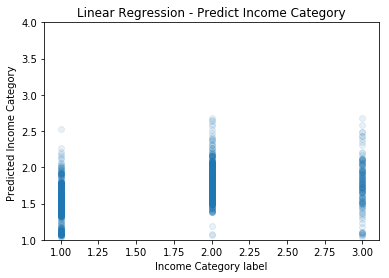

In [34]:
y_predict_lr = model.predict(X_test)

plt.scatter(y_test,y_predict_lr, alpha = 0.1)
plt.title("Linear Regression - Predict Income Category")
plt.xlabel('Income Category label')
plt.ylabel('Predicted Income Category ')
plt.ylim(1,4)
plt.show()

In [35]:
print( model.coef_ )

[[0.01321681 0.1166446  0.26001852]]


#### Linear Regression - N/A Income data ####

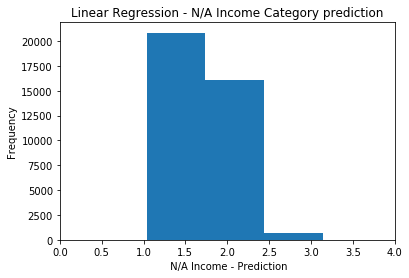

In [36]:
na_income_predict_lr = model.predict(na_income_fs_ml)

from matplotlib import pyplot as plt
plt.hist( na_income_predict_lr, bins=3)
plt.title("Linear Regression - N/A Income Category prediction")
plt.xlabel(" N/A Income - Prediction")
plt.ylabel("Frequency")
plt.xlim(0, 4)
plt.show()


In [37]:
## K-NEAREST NEIGHBOR REGRESSOR ##

In [38]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor( n_neighbors = 25, weights = "distance")
regressor.fit( X_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=25, p=2,
          weights='distance')

#### K-Nearest Neighbors Regressor - Observation ####
Based on the test values - we compare the Income Category vs Predicted Income Category - we have the following observations
1. Low Income category predictions have more than half of the entries in the Middle Income Category
2. Middle Income category prediction is scattered quite accurately in a 0.5 range around the value of 2 (Middle income Category)
3. There is some entries with High income category prediction - but accuracy is low

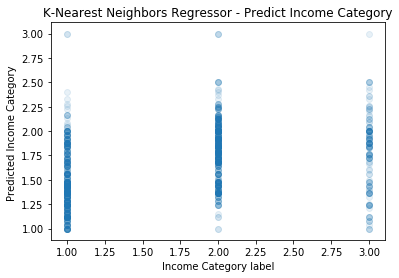

In [39]:
y_predict_knr = regressor.predict( X_test)

plt.scatter(y_test,y_predict_knr, alpha = 0.1)
plt.title("K-Nearest Neighbors Regressor - Predict Income Category")
plt.xlabel('Income Category label')
plt.ylabel('Predicted Income Category ')
plt.show()

#### K-Nearest Neighbors Regressor - N/A Income data ####

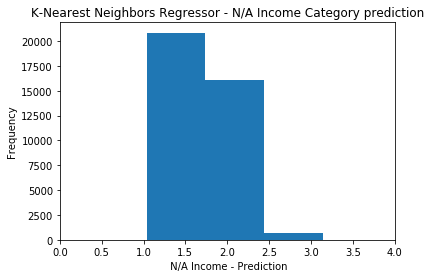

In [40]:
na_income_predict_knr = model.predict(na_income_fs_ml)

from matplotlib import pyplot as plt
plt.hist( na_income_predict_knr, bins=3)
plt.title("K-Nearest Neighbors Regressor - N/A Income Category prediction")
plt.xlabel(" N/A Income - Prediction")
plt.ylabel("Frequency")
plt.xlim(0, 4)
plt.show()
